In [18]:
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
df = pd.read_csv('diabetes.csv')
df.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.130,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


In [20]:
df['Insulin'] = df['Insulin'].map( lambda x : df.Insulin.mean() if x == 0 else x).round(1)
df['SkinThickness'] = df['SkinThickness'].map( lambda x : df.SkinThickness.mean() if x == 0 else x).round(1)
df['Glucose'] = df['Glucose'].map( lambda x : df.Glucose.mean() if x == 0 else x).round(1)
df['BloodPressure'] = df['BloodPressure'].map( lambda x : df.BloodPressure.mean() if x == 0 else x).round(1)
df['BMI'] = df['BMI'].map( lambda x : df.BMI.mean() if x == 0 else x).round(1)


In [21]:
#get the shape of the data
df.shape

(768, 9)

In [22]:
#count the empty values in each column
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
#another way to check for any null or missing values
df.isnull().values.any()

False

In [24]:
#view some basic stat
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681641,72.254557,26.595703,118.660417,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436015,12.115997,9.638053,93.080252,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.500000,79.800000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.800000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
#Get a count of the number of patients with diabet
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

C:\Users\Under\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

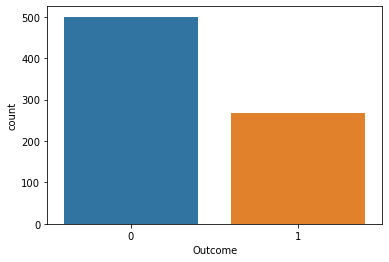

In [26]:
#visualize the count
sns.countplot(df['Outcome'])

<AxesSubplot:xlabel='Age', ylabel='count'>

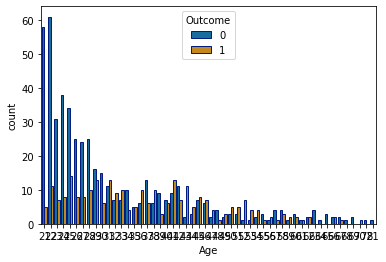

In [27]:
#look at the number of people with diabetes that exceed the number of people without diabet


#Visualize the data
sns.countplot(x = 'Age', hue = "Outcome", data=df, palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors=1))

In [28]:
#Get the corrolation of the columns
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127963,0.208984,0.013103,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127963,1.000000,0.219667,0.160587,0.396596,0.231469,0.137106,0.266599,0.492909
BloodPressure,0.208984,0.219667,1.000000,0.133895,0.010935,0.281232,0.000376,0.326743,0.162981
SkinThickness,0.013103,0.160587,0.133895,1.000000,0.240658,0.535488,0.155117,0.026022,0.174811
Insulin,-0.018082,0.396596,0.010935,0.240658,1.000000,0.189850,0.157806,0.038653,0.179186
BMI,0.021546,0.231469,0.281232,0.535488,0.189850,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137106,0.000376,0.155117,0.157806,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266599,0.326743,0.026022,0.038653,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492909,0.162981,0.174811,0.179186,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

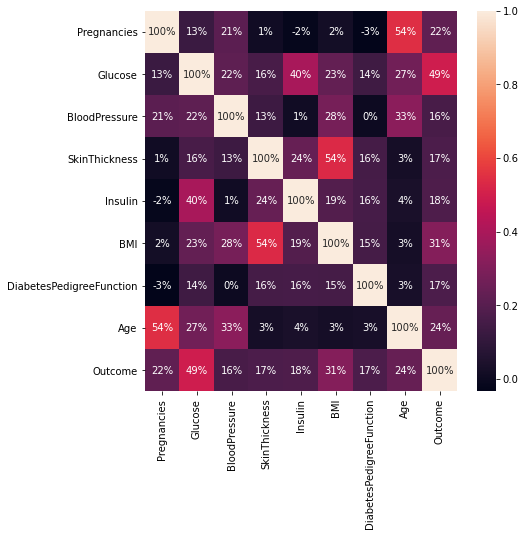

In [29]:
#visualize the corr data
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot = True, fmt = '.0%')

In [30]:
#Split the db into the feature data and the target data

X = df.iloc [:,:-1].values
Y = df.iloc [:,-1].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 1)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="liblinear",multi_class="auto",max_iter=5000).fit(X_train,Y_train)

In [32]:
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
Y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,Y_pred)
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
#[X_test, Y_pred]



In [33]:
accuracy_score(Y_test,Y_pred)


0.640625

In [34]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l2'],'C':[0.001,.009,0.01,.09,1,5,10,25,15,100]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy')
grid_clf_acc.fit(X_train, Y_train)

#Predict values based on new parameters
Y_pred = grid_clf_acc.predict(X_test)

In [35]:
accuracy_score(Y_test,Y_pred)

0.7760416666666666